# Scratchpad


Scratchpad is a collection of code samples that were written for experimental purposes. These routines live here until they are integrated into other sketches.

In [ ]:
%matplotlib inline

## Plotting heatmaps

In [ ]:

import numpy
import pandas
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import matplotlib as mpl

# Read the data
fp = open('C:\\Users\\vvenkate\\Desktop\\ECTM2017_Plots\\K2P2_Normal_data.xlsx','rb')
d = pandas.read_excel(fp, sheetname='Sheet1', index_col=0, header=0)
td = list(d.columns.values)
md = list(d.index)

td, md = numpy.meshgrid(numpy.array(td), numpy.array(md))

# Setup Figure
# Figure size is in inches
fig = plt.figure(figsize=(7.0,7.0))
 
# Create a grid for different axes
gs = gridspec.GridSpec(3,3)
 
# Create the individual axes
ax = fig.add_subplot(gs[0:,0:])
 
# Set all fonts to serif type and use latex to render fonts
# plt.style.use('vvplot')

# Plot colormap
ax.pcolor(td, md, d, cmap='rainbow')

# Set labels
ax.set_xlabel(r'Transverse Direction')
ax.set_ylabel(r'Machine ')

# Set limits
ax.set_xlim([-725, 725])
ax.set_ylim([ 114, 350])

# Save a png file
fig.show()

## Pressure drop estimator for Porous Media

The law governing flow of fluids through porous media is Darcy's Law, which states

$$ Q = \frac{-\kappa A}{\mu} \frac{\Delta P}{L} $$

where
* $Q$ = total flow rate 
* $\Delta P$ = Pressure drop across porous medium
* $\kappa$ = media permeability, 
* $A$ = total flow area, 
* $L$   = the thickness of the medium 
* $\mu$ = viscosity of the fluid.

In [ ]:
import numpy


def frazier_to_si(frazier):
    """Convert Frazier permeability to SI units
        
    Parameters
    ----------
    frazier : float
        Permeability in frazier units
        
    Returns
    -------
    float
        Permeability in SI units
        
    """
    return frazier*0.00508*0.0000183*0.0007/(0.5*249.1)


# Bag properties
bag_radius = (5.810/2.0)*0.0254 # 5.8" to m
bag_length = 100.63*0.0254      # 100" to m
bag_thickness = 0.001           # m
bag_number = 493
bag_permeability = frazier_to_si(4.0) 
bag_surface_area = bag_number*(2*numpy.pi*bag_radius*bag_length)

# Flow rate
flow = 11666.67*0.0004719474  # ACFM to m^3/s

# Fluid properties
viscosity = 1.983E-5 # Pa.s

# Compute 
delta_p = flow * bag_thickness * viscosity/(bag_permeability*bag_surface_area)
delta_p_inchow = delta_p*0.00402

# Print results
print("Estimated Pressure Drop = {:.3f} Pa".format(delta_p))
print("Estimated Pressure Drop = {:.3f} inches of water".format(delta_p_inchow))

## Kuhlbeck-Leibler Diveregence for sum of IID random variables

C:\Users\vvenkate\Software\anaconda\envs\py3\lib\site-packages\ipykernel_launcher.py:14: VisibleDeprecationWarning: Passing `normed=True` on non-uniform bins has always been broken, and computes neither the probability density function nor the probability mass function. The result is only correct if the bins are uniform, when density=True will produce the same result anyway. The argument will be removed in a future version of numpy.
  
C:\Users\vvenkate\Software\anaconda\envs\py3\lib\site-packages\numpy\lib\histograms.py:908: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


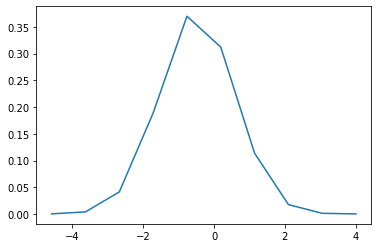

In [1]:
import numpy
import numpy.random 
import scipy.stats

import matplotlib.pyplot as plt

# Generate a gaussian random variable
nsamples = 1000000
nrvs_start =  2
nrvs_end = 2

bins = numpy.linspace(-0.5,0.5)
q1 = numpy.random.normal(0,1,nsamples)
qx ,binq = numpy.histogram(q1, normed=True)

plt.plot(binq[:-1], qx)

px =[] 
for i in range(nrvs_start, nrvs_end+1):
    p = numpy.zeros(nsamples)
    for j in range(i):
        p = p + numpy.random.uniform(nsamples)
    p = p/i - 0.5
    px, binp = numpy.histogram(p, bins, density=True)
    # plt.bar(bins[:-1], px)
    
plt.show()
    
    

## Generating number blocks for reading excel sheet data

In [ ]:
import numpy
import itertools

block_nrows = [ ['Header',     3 ],
                ['Section1',  21 ],
                ['Section2',  21 ]]

def get_blocks(block_nrows,start_row, start_col, end_col):
    names = [list(a) for a in zip(*block_nrows)][0]
    bs = [0] + [list(a) for a in zip(*block_nrows)][1]
    
    rs = (start_row + 
          numpy.array(list(itertools.accumulate(bs))) + 
          numpy.arange(len(bs)))
    
    block_array = [ (n, a, b, start_col, end_col) 
                   for n,a,b in zip(names,
                                    rs[:-1].astype(int).tolist(),
                                    (rs-2)[1:].astype(int).tolist()) ]
    
    return block_array

print(get_blocks(block_nrows,20,3,22))

## Partitioning a set of objects

In [ ]:
# Generates set partitions recursively
def partitions(set_):
    if not set_:
        yield []
        return
    for i in range(2**len(set_)//2):
        parts = [set(), set()]
        for item in set_:
            parts[i&1].add(item)
            i >>= 1
        for b in partitions(parts[1]):
            yield [parts[0]]+b
            
for a in partitions(set(range(1,5))):
    if all(len(x) == 2 for x in a):
        print(a)
        
print(list(partitions(set(range(1,5)))))

## Lognormal distributions in python

In [ ]:
import numpy.random
import matplotlib.pyplot as plt


mu, sigma = 3., 1. # mean and standard deviation
s = numpy.random.lognormal(mu, sigma, 1000)

count, bins, ignored = plt.hist(s, 100, normed=True, align='mid')
plt.show()

## Ensure files are open in correct mode

In [ ]:
import inspect

def ensure_mode(*mode):
    """Decorator to validate file modes
    
    This decorator validates whether a file is open in the correct
    mode before a function acts on it. 
    
    Parameters
    ----------
    mode : str or list
        One or more of the allowed modes - 'w', 'r', 'a'   
    """
    def inner(f):
        @wraps(f)
        def wrapper(*args, **kwargs):
            # args[0] is self on the method
            if args[0].mode in mode:
                return f(*args, **kwargs)
            raise ValueError('Operation available only in {}'.format(args[0].mode))
        setattr(wrapper, '__argspec__', inspect.getargspec(f))
        return wrapper
    return inner

## Type checking function arguments

In [ ]:
from inspect import signature
from functools import wraps

def typeassert(*ty_args, **ty_kwargs):
    """Assert types of arguments passed to functions
    
    Examples
    --------
    @typeassert(int, int)
    def add(x, y):
        return x + y
    """
    def decorate(func):
        if not __debug__:
            return func

        # Map function argument names to supplied types
        sig = signature(func)
        bound_types = sig.bind_partial(*ty_args, **ty_kwargs).arguments

        @wraps(func)
        def wrapper(*args, **kwargs):
            bound_values = sig.bind(*args, **kwargs)
            # Enforce type assertions across supplied arguments
            for name, value in bound_values.arguments.items():
                if name in bound_types:
                    if not isinstance(value, bound_types[name]):
                      raise TypeError(
                        'Argument {} must be {}'.format(name, bound_types[name])
                        )
            return func(*args, **kwargs)
        return wrapper
    return decorate

## Truncated shifted Gaussian random variables

C:\Users\vvenkate\Software\anaconda\envs\py3\lib\site-packages\ipykernel_launcher.py:70: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.


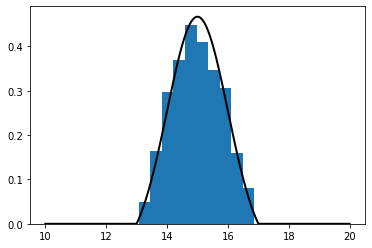

In [2]:
# Truncated shifted gaussian

import numpy
import scipy
import numpy.random
from scipy.stats import rv_continuous
from scipy.special import erf
import matplotlib.pyplot as plt

class truncshiftgaussian_gen(scipy.stats.rv_continuous):
    """Truncated and Shifted Gaussian distribution
    
    Results in a symmetric truncated gaussian.

    Notes
    -----
    The standard form of this distribution is a standard normal truncated to
    the range [mu-a, mu+a] --- notice that a is defined over the domain of the
    standard normal.  To convert clip values for a specific mean and standard
    deviation, use::

        a = (myclip_a - my_mean) / my_std

    where myclip_a is the clip value for your specific mean and standard deviation

    """
    def _pdf(self, x, ac):
        k = numpy.sqrt(2*numpy.pi)*erf(ac/numpy.sqrt(2)) - 2*ac*numpy.exp(-ac**2/2)
        hs = lambda x: 0.5*(numpy.sign(x)+1)
        return hs(ac-numpy.abs(x))*(numpy.exp(-x**2/2) - numpy.exp(-ac**2/2))/k

def truncshiftnorm(mu, sigma, alpha, dim):
    """Return random numbers from a truncated and shifted gaussian distribution

    Parameters
    ----------
    mu : float
        Mean

    sig : float
        Standard Deviation
        
    alpha : float
        Truncation interval as multiple of standard deviation

    dim : list-like or int
        Number of random numbers to be drawn 

    Returns
    -------
    numpy.ndarray
         Array of random numbers drawn from a gaussian distribution
         with mean mu and standard deviation sigma

    Notes
    -----
    Truncation is symmetric about the mean

    """
    assert alpha > 0
    truncshiftgaussian = truncshiftgaussian_gen(a = -alpha/sigma, b = alpha/sigma, name='truncshiftgaussian')
    X = truncshiftgaussian(alpha/sigma, loc=mu, scale=sigma)
    # return X.rvs(dim)
    return X

a = truncshiftnorm(15, 1, 2, 10000)
x = numpy.linspace(10,20,1000)

fig, ax = plt.subplots(1,1)
ax.hist(a.rvs(1000), normed=True, histtype='stepfilled')
ax.plot(x, a.pdf(x), 'k-', lw=2, label='frozen pdf')

plt.show()

## Noisy data smoothing and moving averages

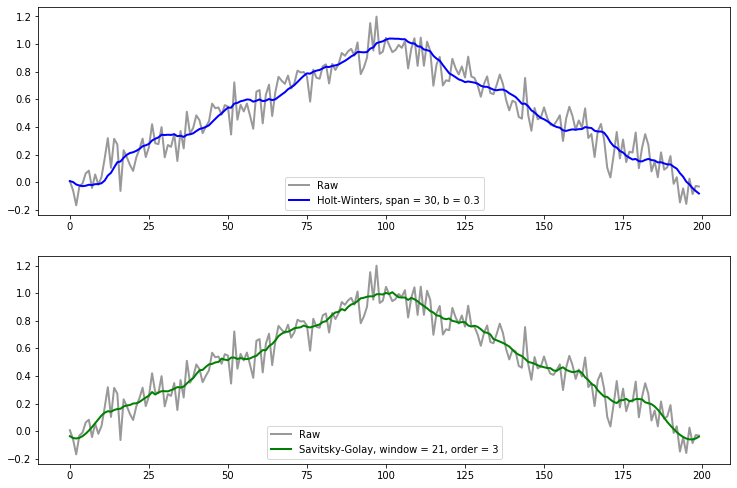

In [1]:
%matplotlib inline

import pandas
import numpy
import scipy.signal
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

def holt_winters_second_order_ewma( x, span, beta ):
    """Holt-Winters second order EWMA
    
    See https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc433.htm
    
    There are two equations associated with Double Exponential Smoothing.
    The current value of the series is used to calculate its smoothed value 
    replacement in double exponential smoothing.
    
    \begin{eqnarray}
        S_t & = & \alpha y_t + (1 - \alpha)(S_{t-1} + b_{t-1}) & & 0 \le \alpha \le 1 \\
            &   &  \\
        b_t & = & \beta(S_t - S_{t-1}) + (1 - \gamma) b_{t-1} & & 0 \le \gamma \le 1 
    \end{eqnarray}
    
    Parameters
    ----------
    x: numpy.ndarray
        Data array
    
    span: float
        Span over which smoothing occurs
        
    beta : float
        Second smoothing parameter
    
    Return
    ------
    numpy.ndarray
        Smoothed data
    """
    N = x.size
    alpha = 2.0 / ( 1 + span )
    s = numpy.zeros(( N, ))
    b = numpy.zeros(( N, ))
    s[0] = x[0]
    for i in range( 1, N ):
        s[i] = alpha * x[i] + ( 1 - alpha )*( s[i-1] + b[i-1] )
        b[i] = beta * ( s[i] - s[i-1] ) + ( 1 - beta ) * b[i-1]
    return s

# Savitsky-Golay
savitsky_golay = scipy.signal.savgol_filter
    
# Cook up some noisy data
x = numpy.linspace(0,1,100)
x = numpy.hstack((x,x[::-1]))
y = x + numpy.random.normal( loc=0, scale=0.1, size=200 )

# Plot 
fig = plt.figure(figsize=(12.40,8.40))
gs = gridspec.GridSpec(2, 1)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])

# Raw data
ax1.plot( y, 'k', lw=2, alpha=0.4, label='Raw' )
ax2.plot( y, 'k', lw=2, alpha=0.4, label='Raw' )
# ax3.plot( y, 'k', lw=2, alpha=0.4, label='Raw' )

# Holt-Winters EWMA
ax1.plot( holt_winters_second_order_ewma( y, 20, 0.3 ), 'b', lw=2, label='Holt-Winters, span = 30, b = 0.3' )

# Savitsky-Golay
ax2.plot( savitsky_golay(y, 21, 3), 'g', lw=2, label='Savitsky-Golay, window = 21, order = 3')

ax1.legend(loc=8)
ax2.legend(loc=8)

plt.show()

# Performing operations on pandas groupby groups

In [39]:
import pandas
import numpy

def random_dates(start, end, is_datetime=True, n=10): 
    """Generating random datetimes
    
    
    Unix timestamp is in ns by default. The function divides the unix time value by 10**9 
    to make it seconds (or 24*60*60*10**9 to make it days). The corresponding unit variable 
    is passed to the pandas.to_datetime function. 
    
    Parameters
    ----------
    start: datetime.datetime
        Starting date
        
    end: datetime.datetime
        End date of range
        
    n: int
        Number of date times to generate
        
    is_datetime: Bool
        Is the output format datetime or 
    """
    (divide_by, unit) = (10**9, 's') if is_datetime else (24*60*60*10**9, 'D')

    start_u = start.value//divide_by
    end_u = end.value//divide_by

    return pandas.to_datetime(numpy.random.randint(start_u, end_u, n), unit=unit) 

start = pandas.to_datetime('2015-01-01')
end = pandas.to_datetime('2018-01-01')
random_dates(start, end, is_datetime=False)

DatetimeIndex(['2016-07-30', '2017-01-11', '2015-11-28', '2015-01-22',
               '2015-06-29', '2015-07-02', '2015-11-14', '2015-08-07',
               '2017-05-20', '2016-06-30'],
              dtype='datetime64[ns]', freq=None)

In [31]:
import pandas
import datetime

dates = [pandas.to_datetime(x) for x in ['2018-01-01', '2019-03-01', '2020-01-01', '2019-03-01',
                                         '2019-05-01', '2020-03-01', '2020-01-01']]

df = pandas.DataFrame({'c':[1,2,3,5,6,5,6],'mtype':['m','m','m','n','n','n','n'], 'dates':dates})
display(df)

,c,mtype,dates
0,1,m,2018-01-01
1,2,m,2019-03-01
2,3,m,2020-01-01
3,5,n,2019-03-01
4,6,n,2019-05-01
5,5,n,2020-03-01
6,6,n,2020-01-01


In [32]:
gf = df.groupby('mtype')

for g in gf:
    print(g[1])

   c mtype      dates
0  1     m 2018-01-01
1  2     m 2019-03-01
2  3     m 2020-01-01
   c mtype      dates
3  5     n 2019-03-01
4  6     n 2019-05-01
5  5     n 2020-03-01
6  6     n 2020-01-01


In [35]:
import numpy

# Get the max date
def idx_mid(df):
    cfcol = df['c'].to_numpy()
    cfcol = numpy.cumsum(cfcol)/numpy.sum(cfcol)
    idx = numpy.argwhere(cfcol > 0.5)[0][0]
    df["dates50"] = df['dates'].iloc[idx-1]
    return df

gf.apply(idx_mid)

,c,mtype,dates,dates50
0,1,m,2018-01-01,2019-03-01
1,2,m,2019-03-01,2019-03-01
2,3,m,2020-01-01,2019-03-01
3,5,n,2019-03-01,2019-05-01
4,6,n,2019-05-01,2019-05-01
5,5,n,2020-03-01,2019-05-01
6,6,n,2020-01-01,2019-05-01


## Dataclasses and averaging numerical values of attributes

In [ ]:
import numpy
import dataclasses

@dataclasses.dataclass
class C:
  a: float
  b: float

  @staticmethod
  def mean(*args):
    mean = numpy.mean([[c.a, c.b] for c in args], axis=0)
    return C(mean[0], mean[1])

c1 = C(5, 6)
c2 = C(10, 12)

c3 = C.mean(c1, c2)
print(c3.a, c3.b)


## Dataclass inheritance

In [5]:
from dataclasses import dataclass
from typing import Optional

class StandardMetaC:
    def __init__(self, name):
        self.name = name

@dataclass
class DataMetaC:
    name: str
  

@dataclass
class Cs(StandardMetaC):
    a: float
    b: float

    def __post_init__(self):
        super().__init__("C class")


@dataclass
class Cd(DataMetaC):
    a: float
    b: float
    name: Optional[str] = "C class"    
    

c1 = Cs(5, 6)
print(c1.__dict__)

c2 = Cd(5, 6)
print(c2.__dict__)


TypeError: non-default argument 'a' follows default argument

In [ ]:
# Add column to dataframe based on a query. True will be marked on rows that match the query
import pandas

df = pandas.DataFrame(
    dict(name=list('AAABBCCCCDEEFGG'), title=list('zyxwvutrqponmlu')))

df2 = df.query('name == "A" | title == "u"')
df2["newcol"] = True
print(df2)

df = df.merge(df2, how="left").fillna({"newcol": False})
print(df)

# Networkx plotting

In [ ]:
import numpy
import networkx as nx
import matplotlib.pyplot as plt


N = 40 
G = nx.grid_2d_graph(N,N)
pos = dict((n, n) for n in G.nodes())
nx.set_node_attributes(G, pos, 'coord')

bottom_nodes = [x for x,y in G.nodes(data=True) if y['coord'][1] < 1]
top_nodes = [x for x,y in G.nodes(data=True) if y['coord'][1] > N-2]


 

edges = list(G.edges)
weights = []

for u,v in edges:
    w = int(numpy.random.random() * 5)
    if w < 2:
        G.remove_edge(u,v)
    else:
        G[u][v]['weight'] = 5
        weights.append(G[u][v]['weight'])
    
paths = []
for source, sink in [(so, si) for si in top_nodes for so in bottom_nodes]:
    try:
        path = nx.shortest_path(G, source=source, target=sink, weight='weight')
        path_edges = list(zip(path[:-1],path[1:]))
        paths.append(path_edges)
    except nx.NetworkXNoPath:
        pass

plt.figure(3,figsize=(12,12))
nx.draw_networkx(G, pos=pos, width=weights, with_labels=False, node_size=0, edge_color='lightgray')
nx.draw_networkx_nodes(G, pos=pos, nodelist=bottom_nodes, node_color='r', node_size=40)
nx.draw_networkx_nodes(G, pos=pos, nodelist=top_nodes, node_color='g', node_size=40)
for p in paths:
    nx.draw_networkx_edges(G, pos=pos, edgelist=p, edge_color='b')

# Unique lists

In [10]:
import collections

original_list = [ "a", "b", "c", "d", "m" ]
# result_list   = [ "a_1", "b_1", "c", "d", "a_2", "b_2", "m", "b_3"]
result = original_list.copy()
indices = collections.defaultdict(list)
print(indices)

if len(original_list) != len(indices.keys()):
    for i,item in enumerate(original_list):
        indices[item].append(i)
    for k, v in indices.items():
        if len(v) > 1:
            for i, p in enumerate(v):
                result[p] = f'{k}_{i+1}'

print(result)



defaultdict(<class 'list'>, {})
defaultdict(<class 'list'>, {'a': [0]})
defaultdict(<class 'list'>, {'a': [0], 'b': [1]})
defaultdict(<class 'list'>, {'a': [0], 'b': [1], 'c': [2]})
defaultdict(<class 'list'>, {'a': [0], 'b': [1], 'c': [2], 'd': [3]})
defaultdict(<class 'list'>, {'a': [0], 'b': [1], 'c': [2], 'd': [3], 'm': [4]})
['a', 'b', 'c', 'd', 'm']
